# Bike Sharing Dataset Exploratory Analysis

+ Based on the Bike Sharing Dataset from [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset), also documented in [1]
+ This notebook analyzes the hourly data, in file hour.csv
+ It is adapted from the corresponding notebook in book [2], chapter 6

---
*References*  
[1] Fanaee-T H. and Gama J. 'Event labeling combining ensemble detectors and background knowledge' in 'Progress in Artificial Intelligence' pp. 1-15. Springer, 2013.  
[2] Sarkar D., Bali R. and Sharma T. 'Practical Machine Learning with Python'. Apress, 2018

## Data Preparation

### Packages

In [13]:
%matplotlib inline
# data and plotting packages
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sn

### Display Settings

In [14]:
pd.options.display.max_colwidth = 60

plt.rcParams['figure.figsize'] = (30, 10)
plt.rcParams['legend.fontsize'] = 'x-large'
plt.rcParams['axes.labelsize'] = 'x-large'
plt.rcParams['axes.titlesize'] = 'x-large'
plt.rcParams['xtick.labelsize'] = 'x-large'
plt.rcParams['ytick.labelsize'] = 'x-large'

sn.set_style('darkgrid')
sn.set_context('notebook', font_scale=1.5)

### Load Dataset

In [15]:
indatapath = '../data/BikeSharing/hour.csv'
hour_df = pd.read_csv(indatapath)
print("Shape of dataset: {}".format(hour_df.shape))

Shape of dataset: (17379, 17)


In [16]:
display(hour_df.head())
display(hour_df.tail())

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61
17378,17379,2012-12-31,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49


### Data Types and Summary Stats

In [18]:
# data types of attributes
hour_df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [19]:
# dataset summary stats; only numeric columns are summarized
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


+ The dataset has 17 attributes (columns) and >17K records (rows)
+ Column 'dtedat' is string, the rest are numeric (int or float)
+ We confirm that the weather attributes below have been normalized (as stated in the Readme.txt):
    + temp, atemp, humidity, windspeed
+ The categorical attributes below are represented as integers
    + season, yr, holiday, weathersit

### Standardize Attribute Names and Data Types

In [28]:
hour_df.rename(columns={'instant':'rec_id',
                      'dteday':'datetime',
                      'holiday':'is_holiday',
                      'workingday':'is_workday',
                      'weathersit':'weather_cond',
                      'hum':'humidity',
                      'mnth':'month',
                      'cnt':'total_count',
                      'hr':'hour',
                      'yr':'year'}, inplace=True)

In [29]:
# date time conversion
hour_df['datetime'] = pd.to_datetime(hour_df.datetime)

# categorical variables
hour_df['season'] = hour_df.season.astype('category')
hour_df['weekday'] = hour_df.weekday.astype('category')
hour_df['is_holiday'] = hour_df.is_holiday.astype('category')
hour_df['is_workday'] = hour_df.is_workday.astype('category')
hour_df['weather_cond'] = hour_df.weather_cond.astype('category')
hour_df['year'] = hour_df.year.astype('category')
hour_df['month'] = hour_df.month.astype('category')
hour_df['hour'] = hour_df.hour.astype('category')

# for seasons, we rename the numerical codes
hour_df.season = hour_df.season.cat.rename_categories(['Winter', 'Spring', 'Summer', 'Fall'])

In [30]:
# look at the summary stats after standardization
display(hour_df.describe())
display(hour_df.describe(include=['category']))

,rec_id,temp,atemp,humidity,windspeed,casual,registered,total_count
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


,season,year,month,hour,is_holiday,weekday,is_workday,weather_cond
count,17379,17379,17379,17379,17379,17379,17379,17379
unique,4,2,12,24,2,7,2,4
top,Summer,1,7,17,0,6,1,1
freq,4496,8734,1488,730,16879,2512,11865,11413


## EDA: Univariate Distributions

### Hourly Distribution of Total Counts, by Season

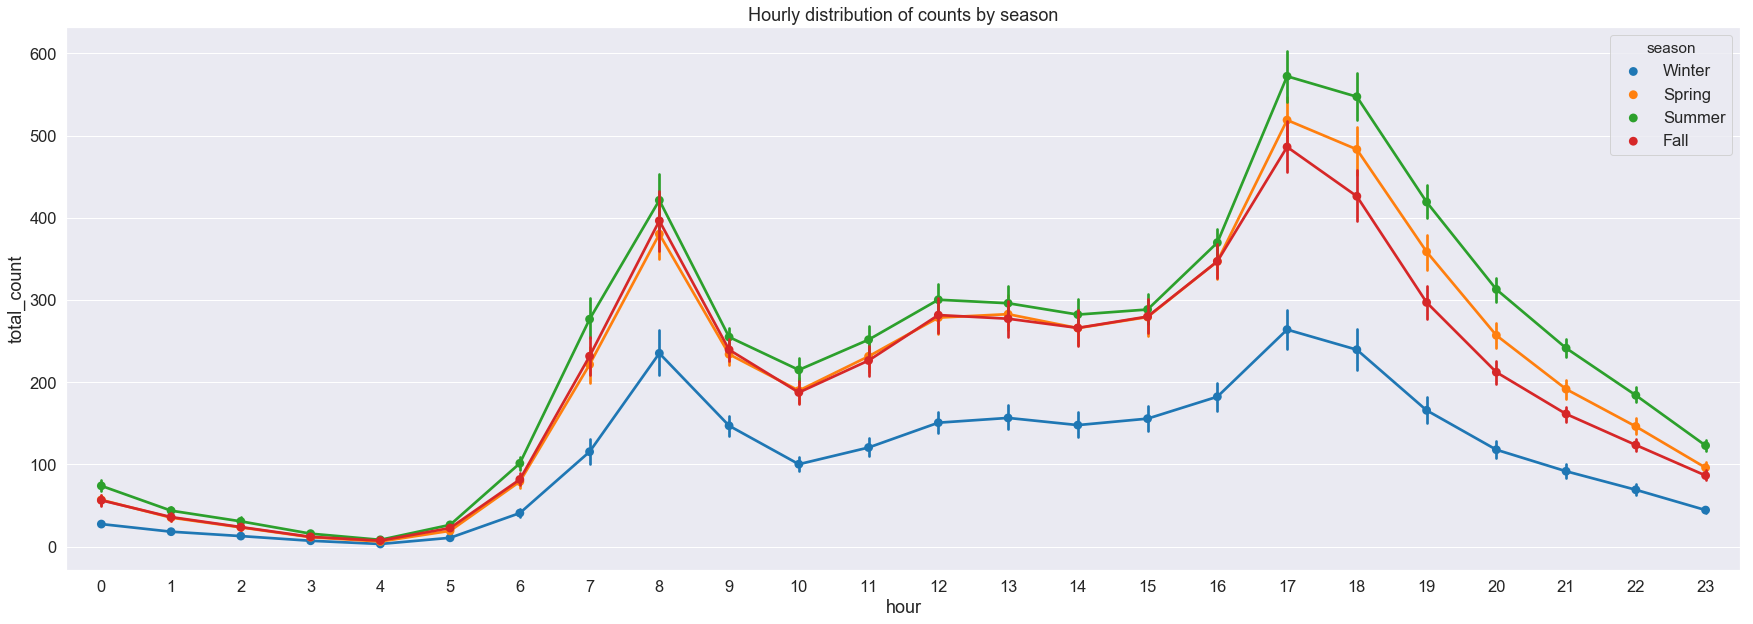

In [35]:
fig, ax = plt.subplots()
sn.pointplot(data=hour_df[['hour', 'total_count', 'season']],
             x='hour', y='total_count', hue='season', ax=ax)
ax.set(title="Hourly distribution of counts by season");

+ Peaks around 8am and 5pm (start/end of working day)
+ Overall higher usage in the second half of the day (aftenoon hours)
+ Winter has the lowest counts

### Hourly Distribution of Total Counts, by Day of week

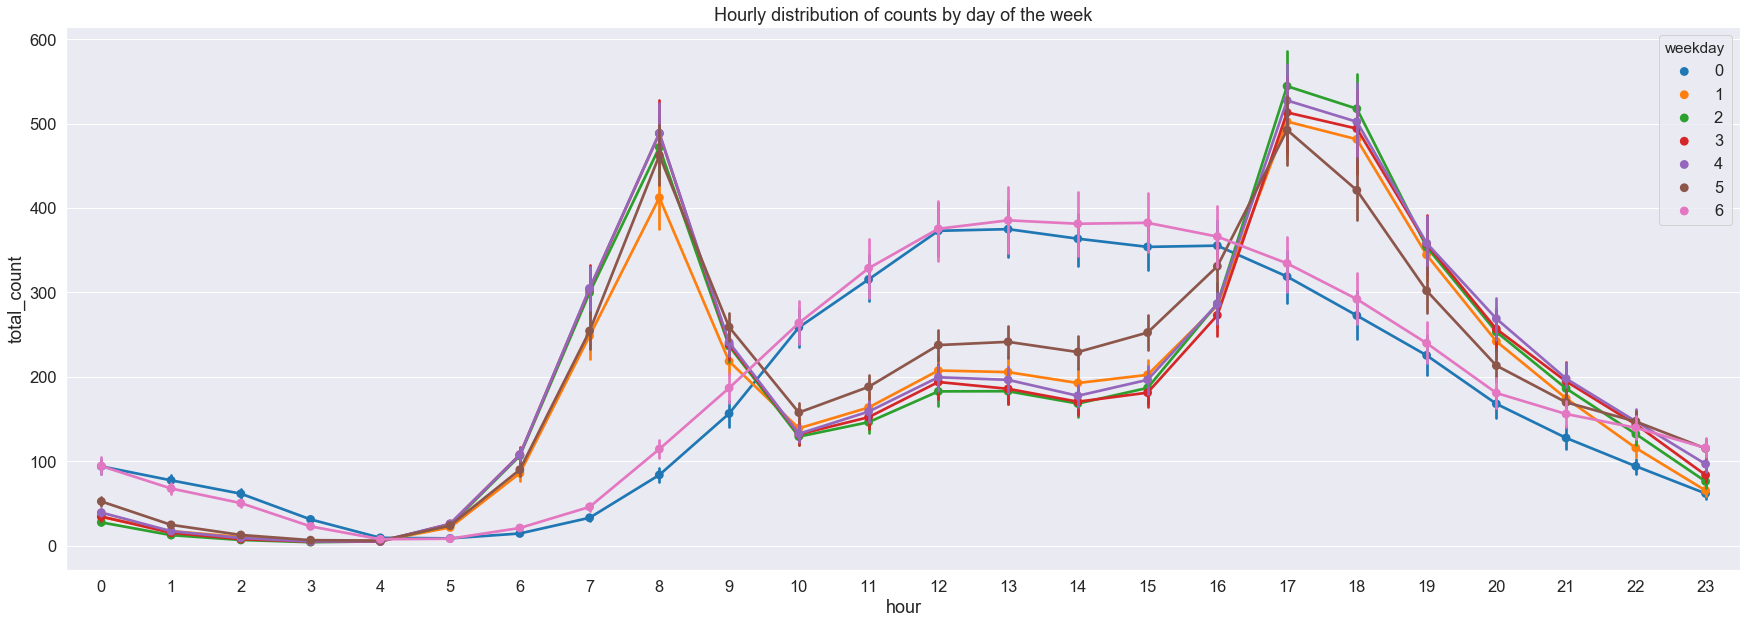

In [36]:
fig, ax = plt.subplots()
sn.pointplot(data=hour_df[['hour', 'total_count', 'weekday']], 
             x='hour', y='total_count', hue='weekday', ax=ax)
ax.set(title="Hourly distribution of counts by day of the week");

+ Weekends (0 and 6) have peak usage during afternoon hours, weekdays (1-5) have peaks at start/end of workday
+ All weekdays follow the same overall trend
+ Weekdays have higher usage compared to weekends

Repeat above, splitting into casual and registered users

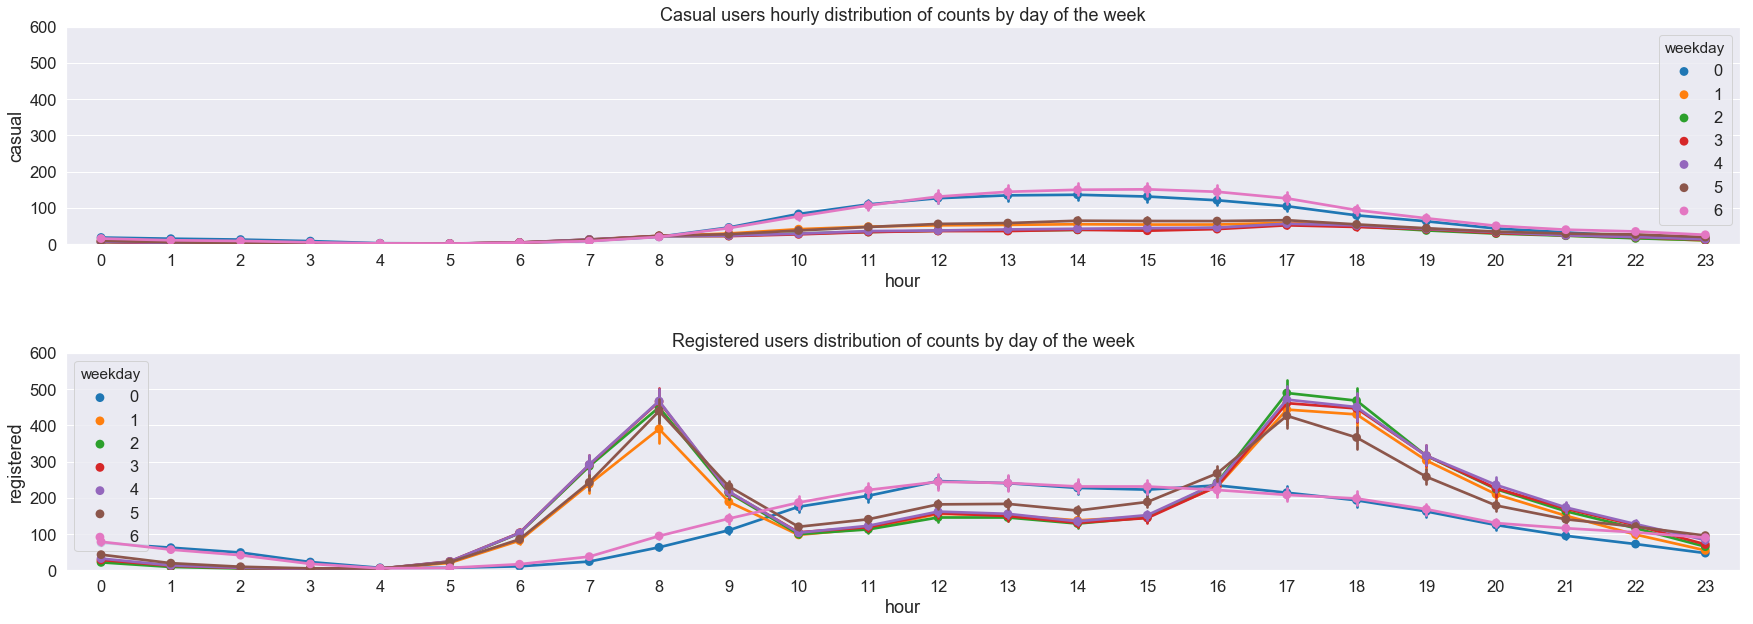

In [37]:
fig, ax = plt.subplots(2)
plt.subplots_adjust(hspace=0.5)
sn.pointplot(data=hour_df[['hour','casual','weekday']], x='hour', y='casual', hue='weekday', ax=ax[0])
ax[0].set(ylim=[0, 600], title="Casual users hourly distribution of counts by day of the week")
sn.pointplot(data=hour_df[['hour','registered','weekday']], x='hour', y='registered', hue='weekday', ax=ax[1])
ax[1].set(ylim=[0, 600], title="Registered users distribution of counts by day of the week");

+ Registered users account for the peaks during workdays
+ Casual user count is lower than registered user count
+ Casual user utilization is heavier on weekends, during morning and afternoon hours

### Boxplots of Total Counts, by Day of Week

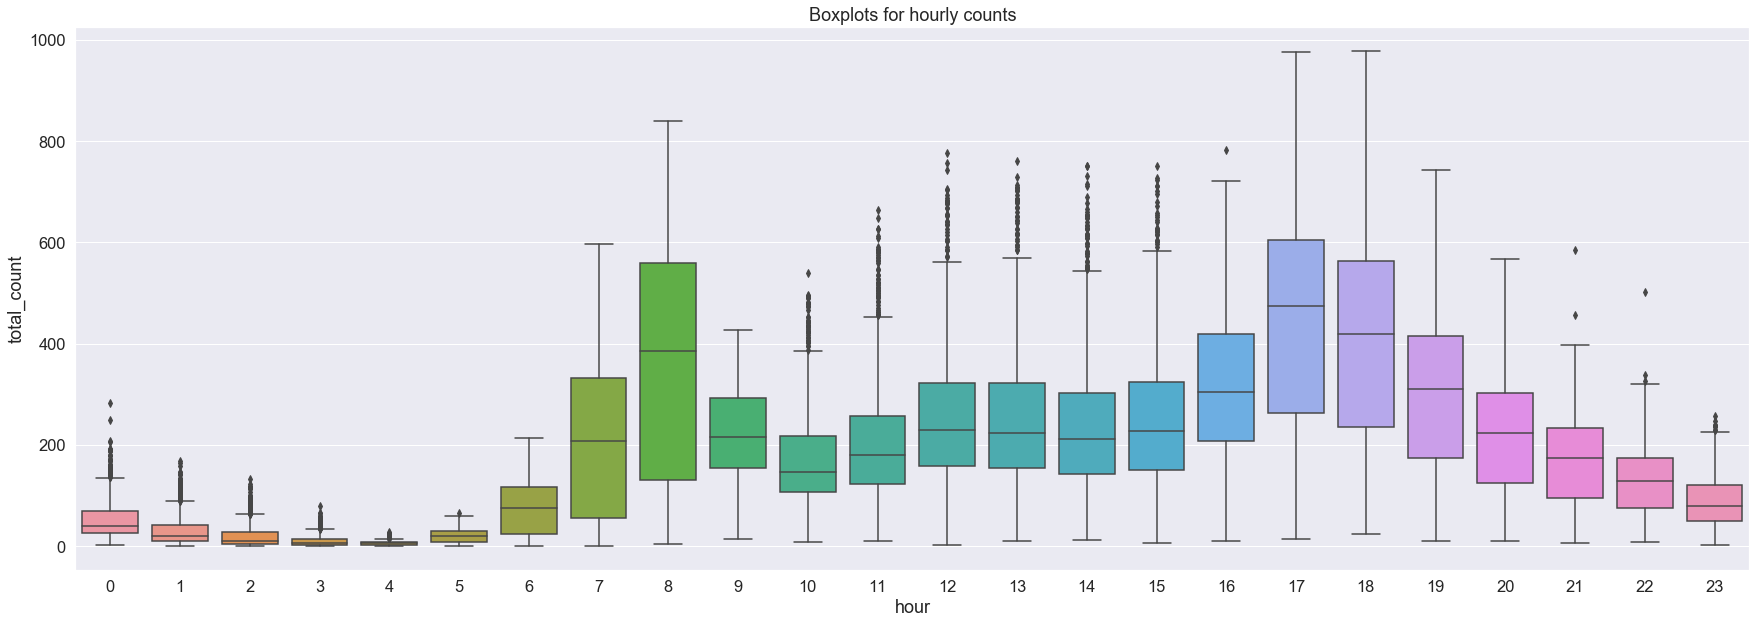

In [13]:
fig, ax = plt.subplots()
sn.boxplot(data=hour_df[['hour','total_count']], x="hour", y="total_count", ax=ax)
ax.set(title="Boxplots for hourly counts");

+ Early hours (0-4) and late nights (21-23) have low counts but significant outliers
+ Afternoon hours also have outliers
+ Peak hours have higher medians and overall counts with virtually no outliers

### Monthly Distribution of Total Counts

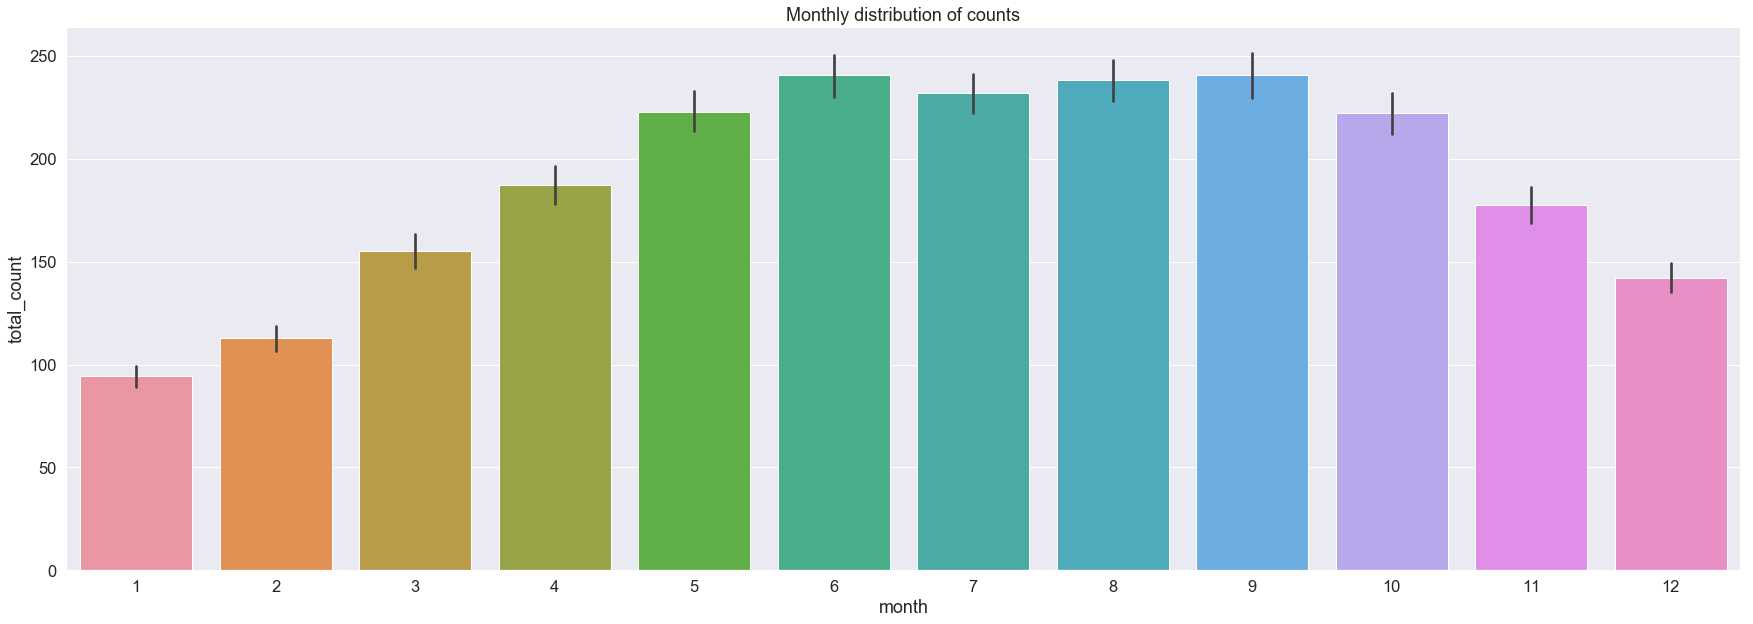

In [14]:
fig, ax = plt.subplots()
sn.barplot(data=hour_df[['month', 'total_count']],
           x="month", y="total_count")
ax.set(title="Monthly distribution of counts");

+ Late Spring, Summer and early Fall months (May-October) have highest counts
+ This is consistent with the by-season distribution

Repeat above, splitting into seasons

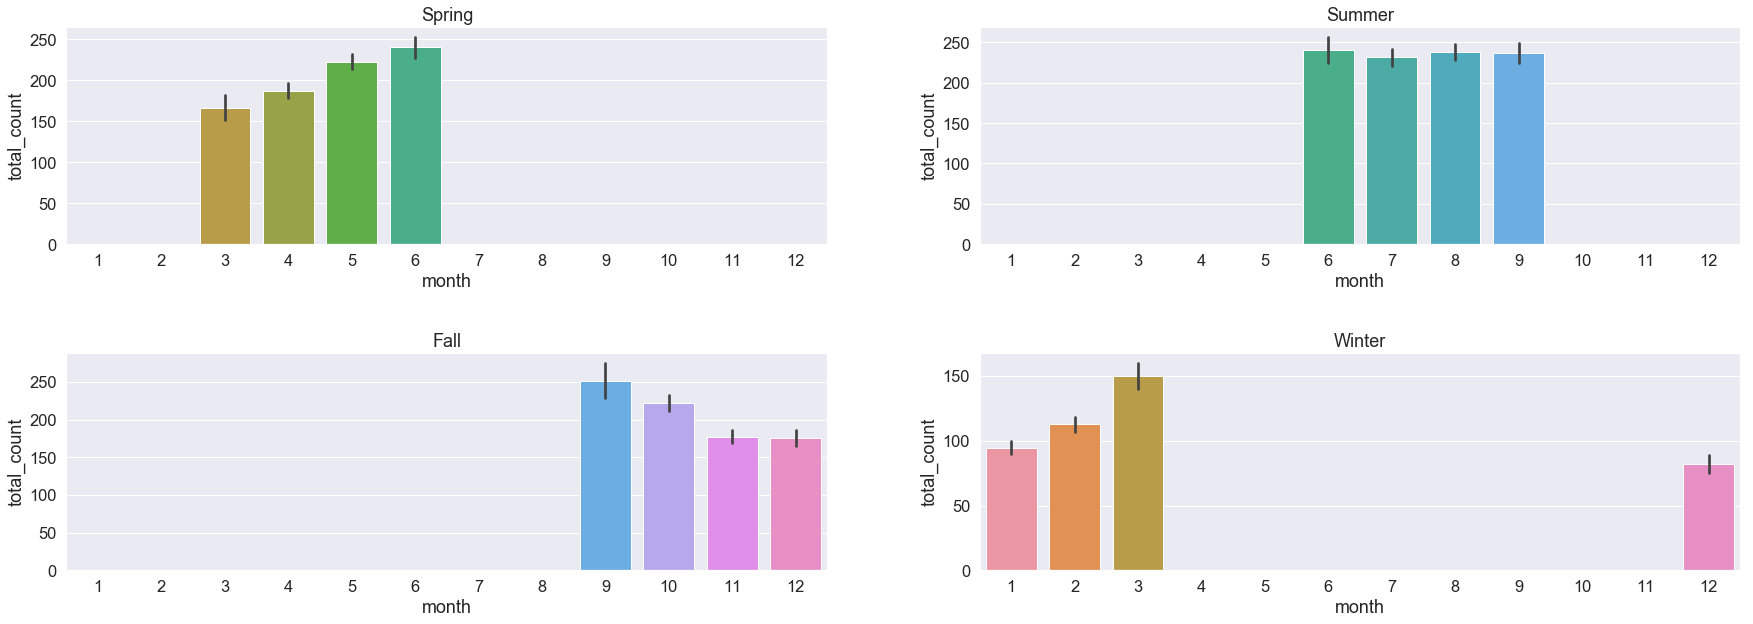

In [15]:
df_col_list = ['month','weekday','total_count']
plot_col_list= ['month','total_count']
spring_df = hour_df[hour_df.season=='Spring'][df_col_list]
summer_df = hour_df[hour_df.season=='Summer'][df_col_list]
fall_df = hour_df[hour_df.season=='Fall'][df_col_list]
winter_df = hour_df[hour_df.season=='Winter'][df_col_list]

fig, ax = plt.subplots(nrows=2,ncols=2)
plt.subplots_adjust(hspace=0.5)
sn.barplot(data=spring_df[plot_col_list], x="month", y="total_count", ax=ax[0][0])
ax[0][0].set(title="Spring")

sn.barplot(data=summer_df[plot_col_list], x="month", y="total_count", ax=ax[0][1])
ax[0][1].set(title="Summer")

sn.barplot(data=fall_df[plot_col_list], x="month", y="total_count", ax=ax[1][0])
ax[1][0].set(title="Fall")

sn.barplot(data=winter_df[plot_col_list], x="month", y="total_count", ax=ax[1][1])  
ax[1][1].set(title="Winter");

### Yearly Distribution of Total Counts

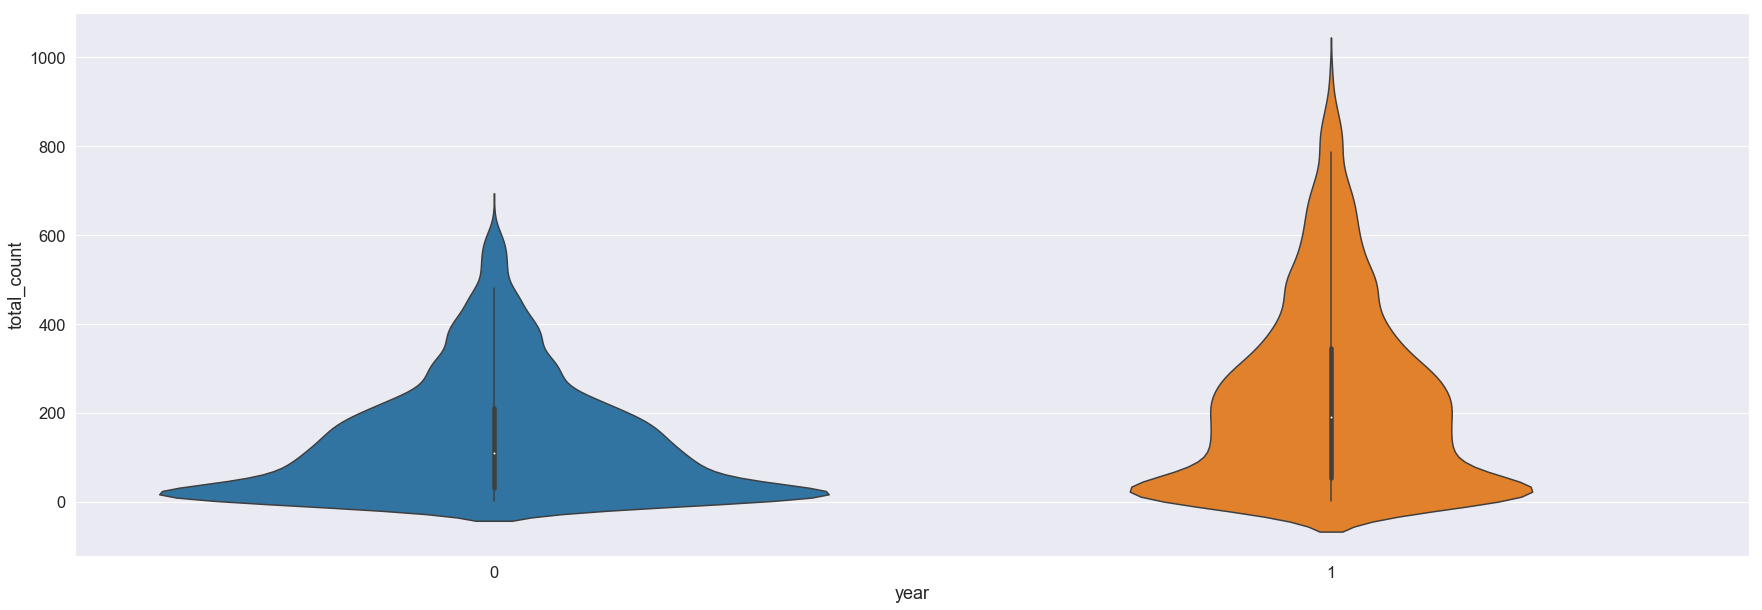

In [16]:
sn.violinplot(data=hour_df[['year', 'total_count']],
              x="year", y="total_count");

+ Both years have multimodal distributions
+ 2011 has lower overall counts with a lower median
+ 2012 has count peaks around 50 and 250

### Working Day vs Holiday Distribution by Season

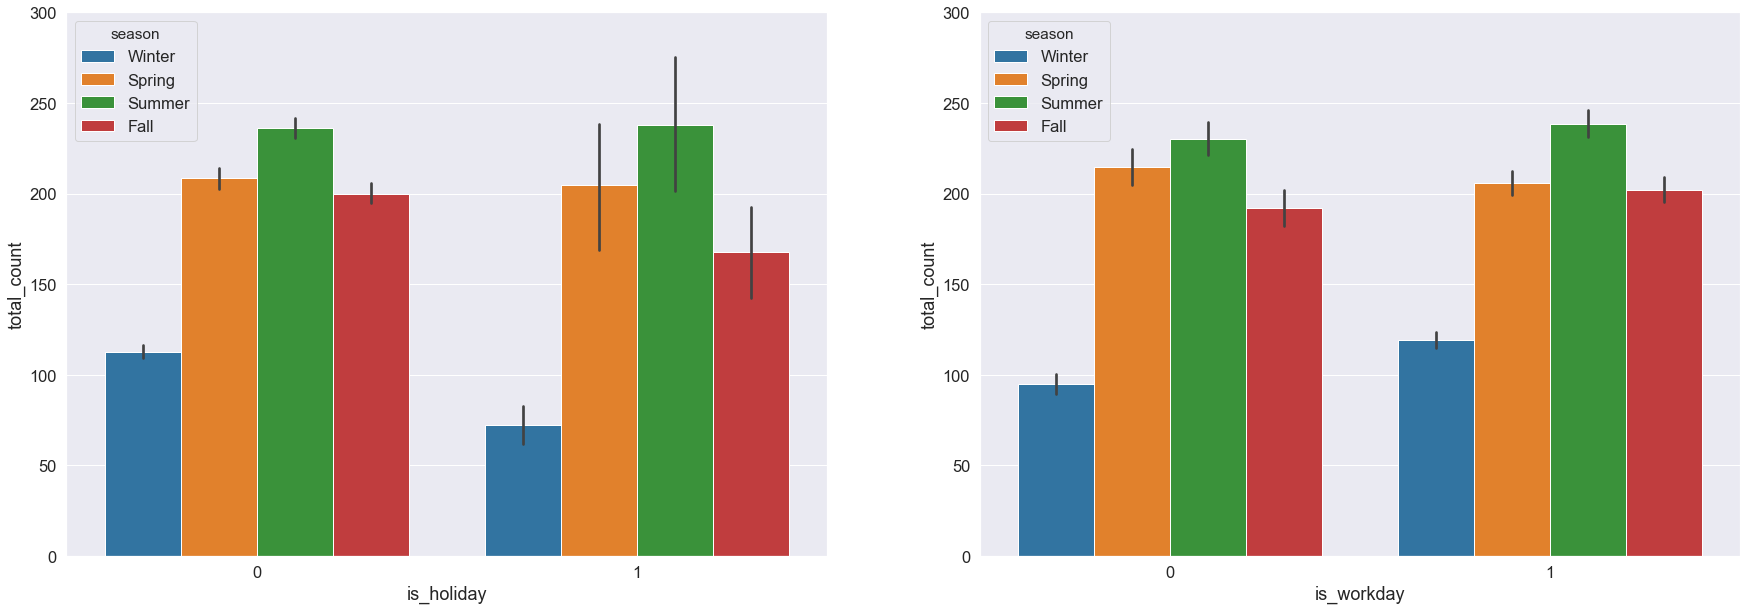

In [17]:
fig, (ax1, ax2) = plt.subplots(ncols=2)
sn.barplot(data=hour_df, x='is_holiday', y='total_count', hue='season', ax=ax1)
ax1.set(ylim=[0, 300])
sn.barplot(data=hour_df, x='is_workday', y='total_count', hue='season', ax=ax2)
ax2.set(ylim=[0, 300]);

### Outliers in Counts and Weather

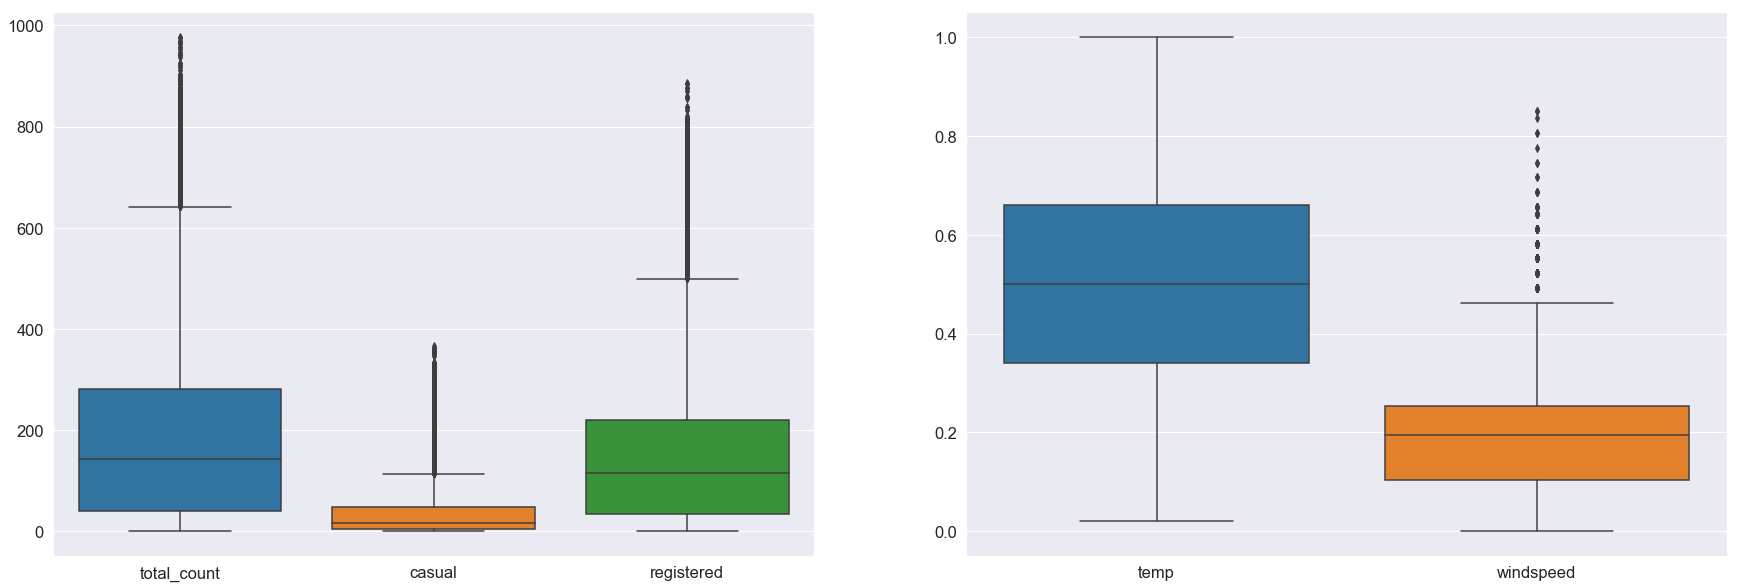

In [18]:
fig, (ax1, ax2) = plt.subplots(ncols=2)
sn.boxplot(data=hour_df[['total_count', 'casual','registered']], ax=ax1)
sn.boxplot(data=hour_df[['temp','windspeed']], ax=ax2);

### Normality Test of total counts
We use the QQ plot from scipy.stats

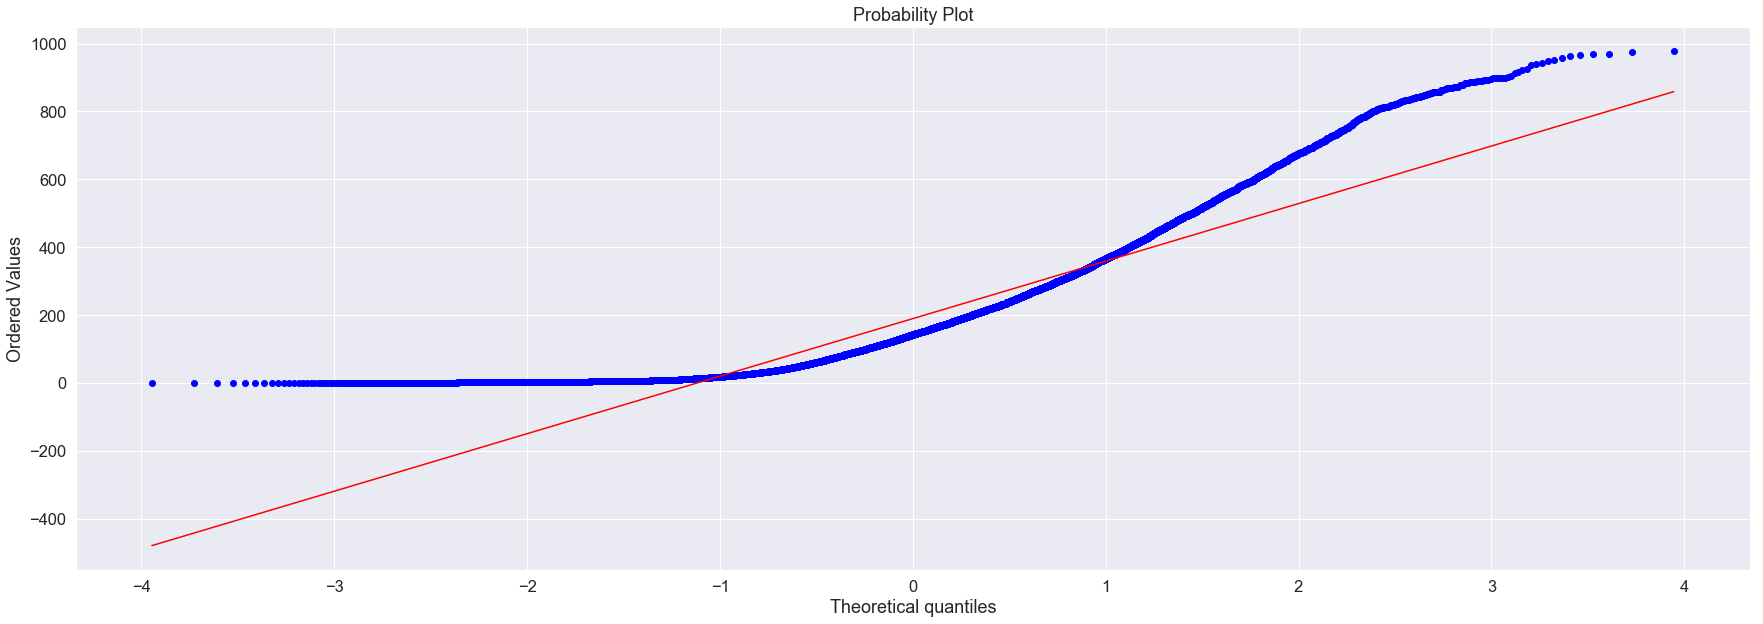

In [19]:
stats.probplot(hour_df.total_count.tolist(), dist="norm", plot=plt);

## EDA: Correlations

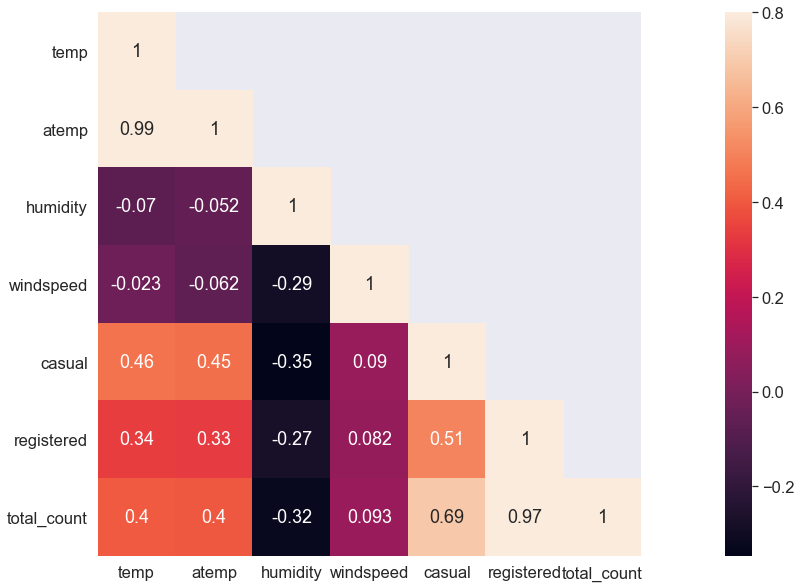

In [38]:
corrMatt = hour_df[["temp", "atemp", "humidity", "windspeed", "casual", "registered", "total_count"]].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
sn.heatmap(corrMatt, mask=mask, vmax=.8, square=True, annot=True)

+ Overall correlation levels are not very high
+ Pairs (registered, total_count) and (casual, total_count) have high correlation, which is expected (total_count = registered + casual)
+ Correlation between temp and atemp is high, which is also expected
+ Windspeed and humidity have negative correlation

## Save the Transformed Dataset
We use the pickle package, that can save (serialize) any Python object

In [1]:
import pickle
outdatapath = '../data/BikeSharing/hour.pkl'
hour_df.to_pickle(outdatapath)

NameError: name 'hour_df' is not defined